# Spam classifier

 Importing necessary libraries



In [ ]:
!pip install colabcode
!pip install fastapi nest-asyncio pyngrok uvicorn

     |████████████████████████████████| 745 kB 35.4 MB/s 
     |████████████████████████████████| 45 kB 3.1 MB/s 
     |████████████████████████████████| 8.3 MB 45.4 MB/s 
     |████████████████████████████████| 396 kB 32.0 MB/s 
     |████████████████████████████████| 428 kB 43.1 MB/s 
     |████████████████████████████████| 58 kB 3.4 MB/s 
     |████████████████████████████████| 54 kB 2.8 MB/s 
     |████████████████████████████████| 78 kB 6.7 MB/s 
     |████████████████████████████████| 129 kB 55.6 MB/s 
     |████████████████████████████████| 53 kB 1.8 MB/s 
     |████████████████████████████████| 125 kB 57.0 MB/s 
     |████████████████████████████████| 124 kB 52.9 MB/s 
     |████████████████████████████████| 124 kB 39.7 MB/s 
     |████████████████████████████████| 122 kB 58.7 MB/s 
     |████████████████████████████████| 122 kB 59.3 MB/s 
     |████████████████████████████████| 122 kB 67.0 MB/s 
     |████████████████████████████████| 122 kB 74.9 MB/s 
     |██████████████████

     |████████████████████████████████| 51 kB 513 kB/s 
     |████████████████████████████████| 61 kB 256 kB/s 
     |████████████████████████████████| 10.1 MB 21.4 MB/s 


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn import feature_extraction, model_selection, naive_bayes, metrics
from sklearn.model_selection import train_test_split
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/Colab Notebooks/

Mounted at /content/drive/
/content/drive/My Drive/Colab Notebooks


# Loading the data

In [ ]:
msgs = pd.read_csv('data/spam.csv',encoding='latin-1')
msgs.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


The last 3 columns do not contain any required information and hence can be removed

In [ ]:
msgs.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)
msgs.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


It would be convenient to rename column v1 as label as it indicates whether the messages are ham/spam and column v2 as messages

In [ ]:
msgs.rename(columns = {'v1': 'label', 'v2': 'message'}, inplace = True)
msgs.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Exploratory data analysis

In [ ]:
msgs.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

#Visualizing data


*  WordCloud library is used to see the most repeated words

Word cloud for spam messages

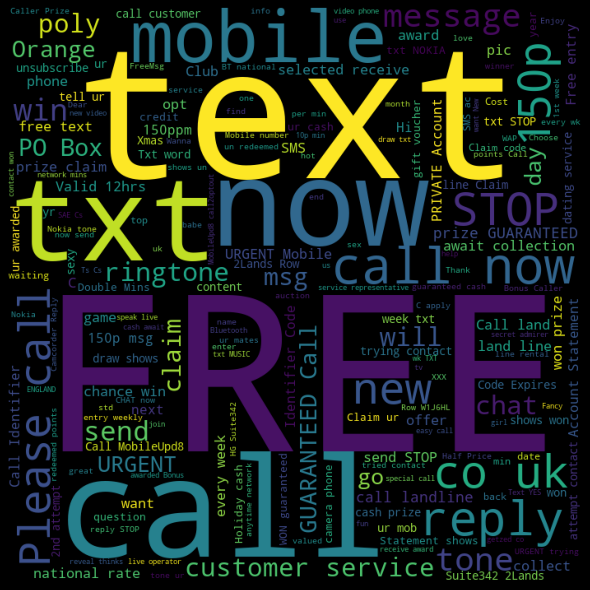

In [ ]:
spam_words = ' '.join(list(msgs[msgs['label'] == 'spam']['message']))
spam_wc = WordCloud(width = 700,height = 700).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

Word cloud for ham messages

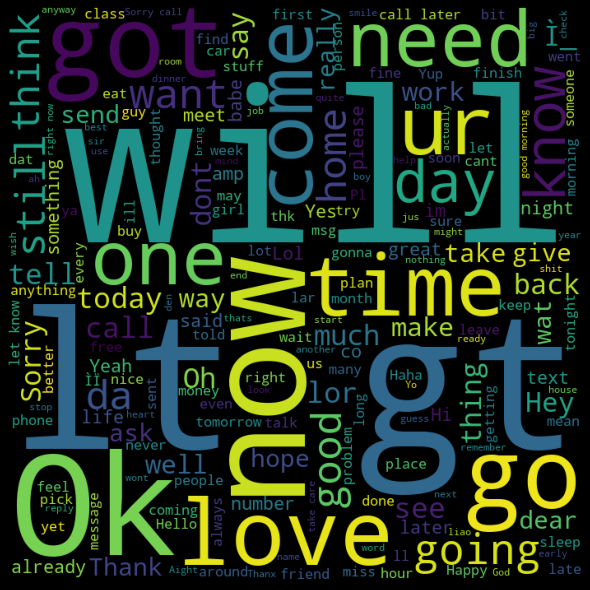

In [ ]:
ham_words = ' '.join(list(msgs[msgs['label'] == 'ham']['message']))
ham_wc = WordCloud(width = 700,height = 700).generate(ham_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(ham_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

# Data Preprocessing


*   Stemming is done to obtain root words
*   Extra symbols are removed
*   messages are converted to lower case
*   Stop words are removed



In [ ]:
le=LabelEncoder() 
y=msgs.iloc[:,0].values
msgs['category']=le.fit_transform(y)

ps = PorterStemmer()
corpus = []
for i in range(0, len(msgs)):
    review = re.sub('[^a-zA-Z]', ' ', msgs['message'][i])
    review = review.lower() 
    review = review.split() #review is a list here

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review) #review is a string now
    corpus.append(review) #list with strings

Creating Bag of words


*   converting the text into vectors using Countvectorizer


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
x = cv.fit_transform(corpus).toarray()
y = msgs.category
y = y.astype('int') 
'''import json
with open('test.txt', 'w') as f:
    f.write(json.dumps(x.tolist()))'''

"import json\nwith open('test.txt', 'w') as f:\n    f.write(json.dumps(x.tolist()))"

Bar plot

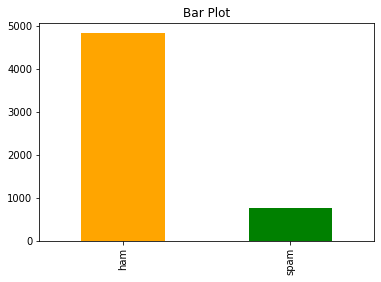

In [ ]:
count=pd.value_counts(msgs['label'], sort= True)
count.plot(kind = 'bar',color = ["orange","green"])
plt.title('Bar Plot')
plt.show();

The dataset is imbalanced and this needs to be balanced as the model would predict all the mails as ham(since more number of ham messages are present) and hence would be biased.


*   We use SMOTE technique to balance the data
*   Synthetic Minority Over-sampling Technique(SMOTE) is a technique that generates new observations by interposing between observations in the existing data. 



In [ ]:
oversample = SMOTE()
x_res,y_res = oversample.fit_resample(x, y)

The resampled dataset is as follows:

In [ ]:
print('Resampled dataset shape {}'.format(Counter(y_res)))

Resampled dataset shape Counter({0: 4825, 1: 4825})


The labels have been mapped as:
* 0 : ham
* 1 : spam

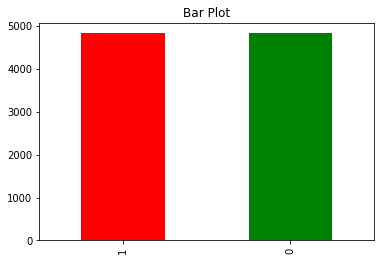

In [ ]:
count=pd.value_counts(y_res, sort= True)
count.plot(kind = 'bar',color = ["red","green"])
plt.title('Bar Plot')
plt.show();

# Performing Train and Test data split


*   Data is split in the ratio of 80:20 for Train:Test respectively 
*   Selection of this data is done randomly


In [ ]:
x_train, x_test , y_train, y_test = train_test_split(x_res,y_res,test_size=0.20, random_state=42)


*   x_train, y_train – training inputs and labels – Training Set
*   x_test, y_test – testing inputs and labels – Testing Set




# Training the model

Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
import pickle
nb = MultinomialNB()
nb.fit(x_train, y_train)
pkl_filepath = "model_folder/model_nb.pkl"  
with open(pkl_filepath, 'wb') as file:  
    pickle.dump(nb, file)
y_pred = nb.predict(x_test)

Confusion matrix and Accuracy score is displayed





In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm)
print("\nAccuracy Score:")
accuracy_score(y_test, y_pred)

Confusion Matrix:
 [[963  22]
 [ 24 921]]

Accuracy Score:


0.9761658031088083

# Plotting a graph out of Confusion matrix

Text(33.0, 0.5, 'Actual')

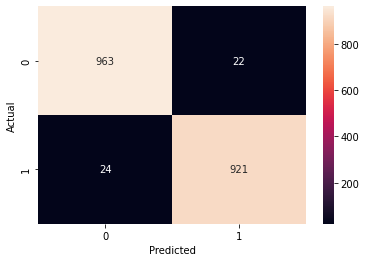

In [ ]:
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Prediction
A spam message

In [ ]:
test = ["Win cash worth Rs.1000/-"]
test_vec = cv.transform(test)
result = nb.predict(test_vec)
print(le.inverse_transform(result))

['spam']


A ham message

In [ ]:
test1 = ["Get well soon"]
test_vec = cv.transform(test1)
result = nb.predict(test_vec)
print(le.inverse_transform(result))

['ham']


# Fast-API


In [ ]:
!ngrok authtoken 220SCns5YHDIFj4itqU7FE7plag_5d33PkwGRio5eXxCSiN8o

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
from fastapi import FastAPI, Request, HTTPException
from fastapi.responses import UJSONResponse
from pydantic import BaseModel

app = FastAPI()  

class SpamText(BaseModel):
    text : str

@app.on_event("startup")
def load_model():
    global nb
    nb = pickle.load(open("model_folder/model_nb.pkl", "rb"))

@app.get('/index')
def index():
    return {'message': 'This is the homepage of the API '}

@app.post('/predict')
def classify_message(data: SpamText):
  testlist = [data.text]
  test_vec = cv.transform(testlist)
  result = nb.predict(test_vec)
  verdict = le.inverse_transform(result)
  print(verdict)
  return verdict[0]


#Running the model in localhost

In [ ]:
import nest_asyncio 
from pyngrok import ngrok
import uvicorn

ngrok_tunnel = ngrok.connect(8050)
print('Public URL:', ngrok_tunnel.public_url)
nest_asyncio.apply()
uvicorn.run(app, port=8050)


Public URL: http://de69-35-245-128-155.ngrok.io


INFO:     Started server process [61]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8050 (Press CTRL+C to quit)


INFO:     223.196.14.4:0 - "GET / HTTP/1.1" 404 Not Found
INFO:     106.51.143.91:0 - "GET / HTTP/1.1" 404 Not Found
INFO:     106.51.143.91:0 - "GET /favicon.ico HTTP/1.1" 404 Not Found
INFO:     106.51.143.91:0 - "GET /docs HTTP/1.1" 200 OK
INFO:     106.51.143.91:0 - "GET /openapi.json HTTP/1.1" 200 OK
INFO:     27.34.249.198:0 - "GET /docs HTTP/1.1" 200 OK
INFO:     27.34.249.198:0 - "GET /openapi.json HTTP/1.1" 200 OK


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [61]


In [ ]:
ngrok.kill()